# Exercice 2 : Clustering - Données INSTAT

## 1) Description des données
- **Source** : Institut National de la Statistique (INSTAT)
- **Variables** : Taux d'achèvement scolaire (%) par région
  - Sexe (Homme/Femme)
  - Niveau de vie (Faible/Moyen/Élevé)
- **Objectif** : Regrouper les régions avec des profils similaires

In [5]:
# Configuration initiale
import os
os.environ['OMP_NUM_THREADS'] = '1'  # Désactive les warnings
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Chargement des données
data = {
    "Région": ["Analamanga", "Vakinankaratra", "Itasy", "Atsinanana", "Boeny"],
    "H_Faible": [58, 62, 55, 60, 65],
    "H_Moyen": [72, 75, 68, 70, 78], 
    "H_Élevé": [85, 88, 80, 82, 90],
    "F_Faible": [52, 57, 50, 55, 60],
    "F_Moyen": [68, 70, 63, 65, 73],
    "F_Élevé": [78, 82, 75, 80, 85]
}
df = pd.DataFrame(data)
df.head()

,Région,H_Faible,H_Moyen,H_Élevé,F_Faible,F_Moyen,F_Élevé
0,Analamanga,58,72,85,52,68,78
1,Vakinankaratra,62,75,88,57,70,82
2,Itasy,55,68,80,50,63,75
3,Atsinanana,60,70,82,55,65,80
4,Boeny,65,78,90,60,73,85


## 2) Visualisations exploratoires

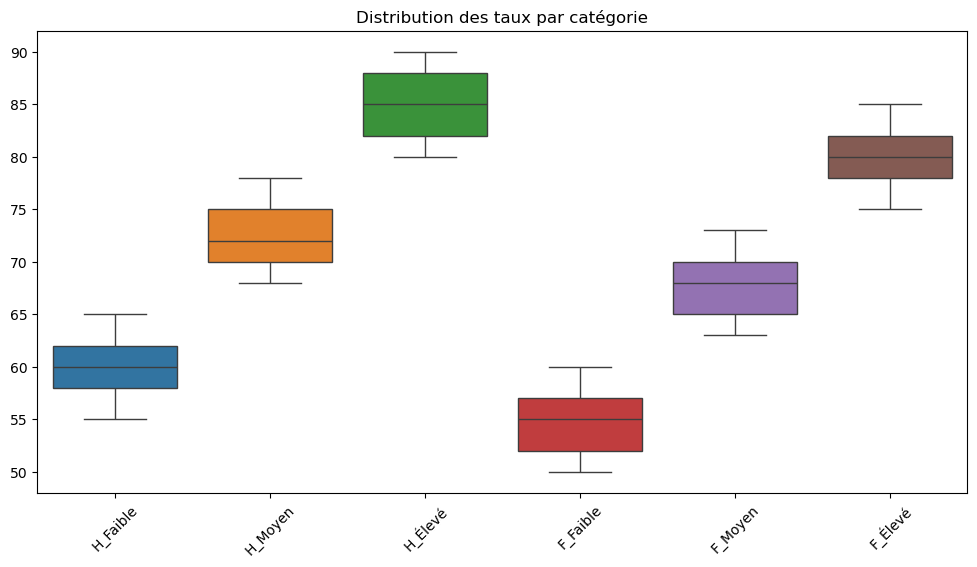

In [7]:
# Boxplot
plt.figure(figsize=(12,6))
sns.boxplot(data=df.drop('Région', axis=1))
plt.title("Distribution des taux par catégorie")
plt.xticks(rotation=45)
plt.show()

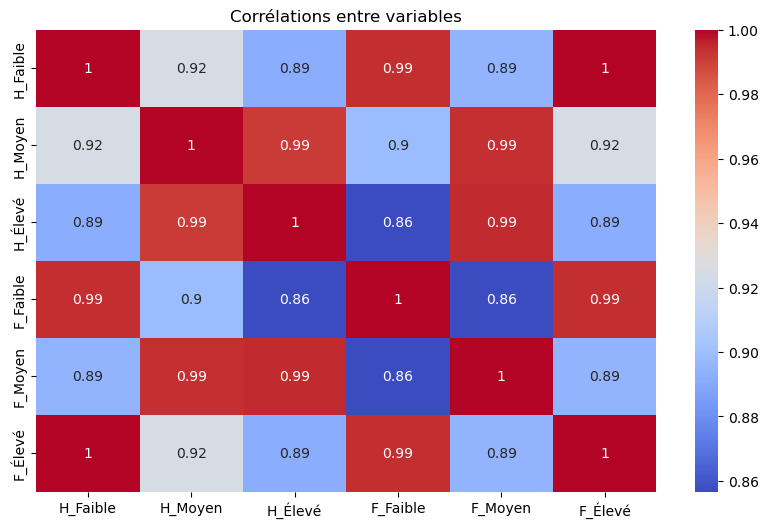

In [9]:
# Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.drop('Région', axis=1).corr(), annot=True, cmap='coolwarm')
plt.title("Corrélations entre variables")
plt.show()

## 3) Clustering avec K-means

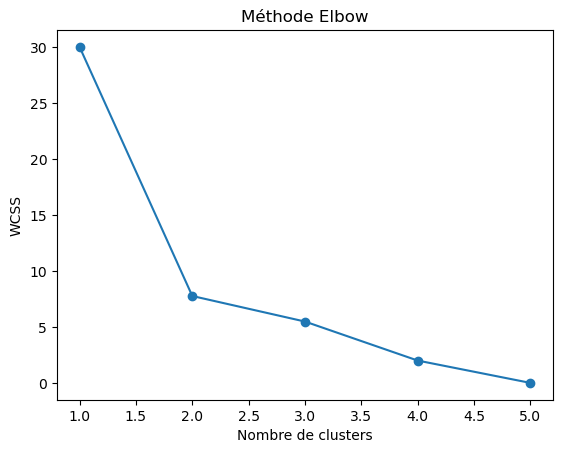

In [11]:
# Préparation des données
X = df.drop('Région', axis=1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Méthode Elbow
wcss = []
for k in range(1, 6):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,6), wcss, marker='o')
plt.title('Méthode Elbow')
plt.xlabel('Nombre de clusters')
plt.ylabel('WCSS')
plt.show()

In [19]:
# Clustering avec k=3
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

## 4) Interprétation des résultats

Moyennes par cluster:
          H_Faible  H_Moyen  H_Élevé  F_Faible  F_Moyen  F_Élevé
Cluster                                                        
0            63.5     76.5     89.0      58.5     71.5     83.5
1            60.0     70.0     82.0      55.0     65.0     80.0
2            56.5     70.0     82.5      51.0     65.5     76.5


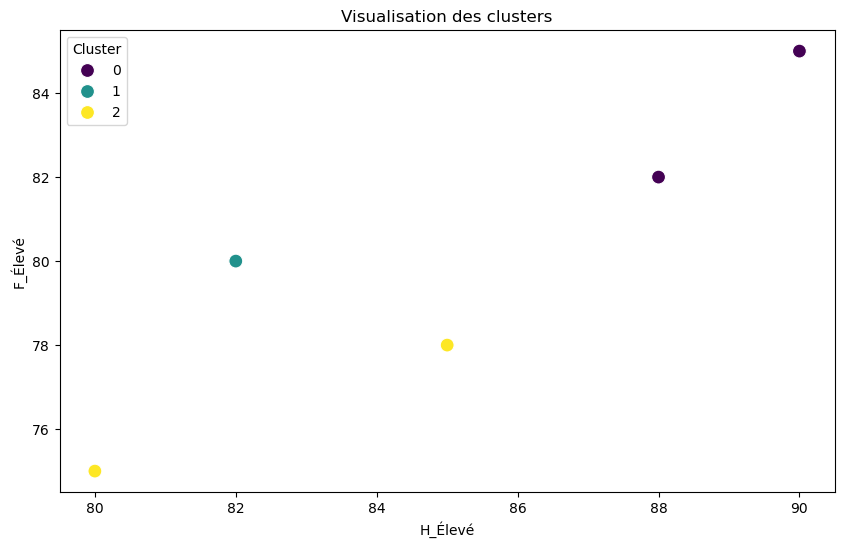

In [21]:
# Profils moyens
print("Moyennes par cluster:\n", df.drop('Région', axis=1).groupby('Cluster').mean())

# Visualisation
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='H_Élevé', y='F_Élevé', hue='Cluster', palette='viridis', s=100)
plt.title("Visualisation des clusters")
plt.show()